<a href="https://colab.research.google.com/github/AbiralBhattarai/NeuralNetworkCode/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
def activation(x):
  """sigmoid activation function

  argument is x = torch.tensor"""
  return 1/(1+torch.exp(-x))

In [ ]:
###generate some fake data
torch.manual_seed(7)

#features vaneko input to our data which are normal variables
features = torch.randn((1,5))
#weights ni random normal variables nai ho(randn_like le chai arguemt kai shape ko tensor banaucha)
weights = torch.randn_like(features)
#ani last ma true bias term
bias = torch.randn((1,1))



In [ ]:
weights = weights.view(5,1) ##resizing weights so that we can perform matrix multiplication with features
h = torch.mm(features,weights) ## torch.mm() is strict about matrix multiplication rules while torch.matmul() resizes matrics on its own and gives result which may not be good.
y = activation(h + bias)
## another way to do it without resizing matrix : ans = activation((features*weights).sum()+bias) or ans = activation(torch.sum(featurs*weights) + bias)
print(y)

tensor([[0.1595]])


In [ ]:
#generate data
torch.manual_seed(7)
#feature matrix
features = torch.randn((1,3))
n_input = features.shape[1] ## no of inputs
n_hidden = 2    # no of hidden layers
n_output = 1    #no of outputs

w1 = torch.randn((n_input,n_hidden)) ## weights from input layer to hidden layers.tensor of (3,2 )in this case
w2 = torch.randn((n_hidden,n_output)) ## weights from hidden layer to output layyer. tensor of(2,1) in this case

b1 = torch.randn((1,n_hidden)) ##bias from input to hidden layer (1,2) in this case
b2 = torch.randn((1,n_output)) ## bias from hidden to output layer (1,1) in this case


In [ ]:
h = activation(torch.mm(features,w1)+b1)
y = activation(torch.mm(h,w2)+b2)
print(y)

tensor([[0.3171]])


In [ ]:
##numpy to torch and back
import numpy as np

In [ ]:
a = np.random.rand(4,3)
a

array([[0.66538284, 0.56178224, 0.22900196],
       [0.08657738, 0.97582309, 0.76398856],
       [0.76265514, 0.79326838, 0.80352756],
       [0.34678347, 0.05883432, 0.64236331]])

In [ ]:
b=torch.from_numpy(a)
b

tensor([[0.6654, 0.5618, 0.2290],
        [0.0866, 0.9758, 0.7640],
        [0.7627, 0.7933, 0.8035],
        [0.3468, 0.0588, 0.6424]], dtype=torch.float64)

In [ ]:
b.numpy()

array([[0.66538284, 0.56178224, 0.22900196],
       [0.08657738, 0.97582309, 0.76398856],
       [0.76265514, 0.79326838, 0.80352756],
       [0.34678347, 0.05883432, 0.64236331]])

In [ ]:
b.mul_(2)

tensor([[1.3308, 1.1236, 0.4580],
        [0.1732, 1.9516, 1.5280],
        [1.5253, 1.5865, 1.6071],
        [0.6936, 0.1177, 1.2847]], dtype=torch.float64)

In [ ]:
a

array([[1.66331642, 0.26984095, 1.41631732],
       [0.40139134, 0.9945588 , 1.66148065],
       [1.68691687, 1.07390081, 0.46782783],
       [0.67897644, 1.01444723, 1.16048455]])

In [ ]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [ ]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images,labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


TypeError: Invalid shape (784,) for image data

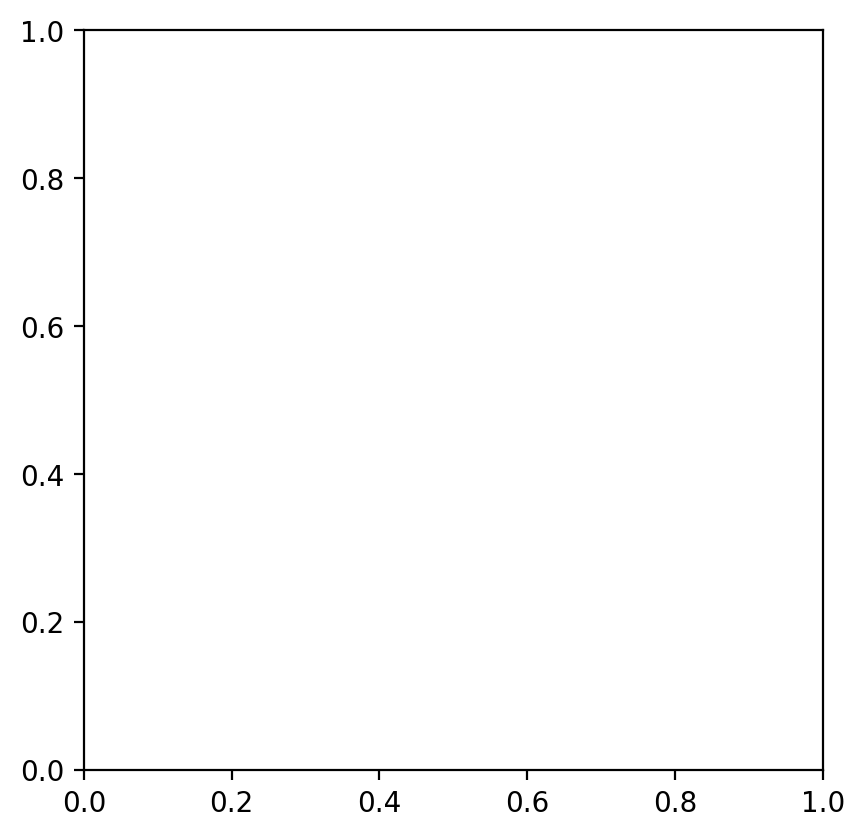

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [ ]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

In [ ]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [ ]:
from torch import nn

In [ ]:
class network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,256)
    self.outupt = nn.Linear(256,10)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)


def forward(self,x):
  x = self.hidden(x)
  x = self.sigmoid(x)
  x = self.outupt(x)
  x = self.softmax(x)

  return x



In [ ]:
model = network()
model

network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (outupt): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.h1 = nn.Linear(784,128)
    self.h2 = nn.Linear(128,64)
    self.h3 = nn.Linear(64,10)


  def forward(self,x):
    x = self.h1(x)
    x = F.relu(x)
    x = self.h2(x)
    x = F.relu(x)
    x = self.h3(x)
    x = F.softmax(x, dim=1)

    return x

model = Network()
model

Network(
  (h1): Linear(in_features=784, out_features=128, bias=True)
  (h2): Linear(in_features=128, out_features=64, bias=True)
  (h3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
print(model.h1.weight)
print(model.h1.bias)

Parameter containing:
tensor([[ 0.0192,  0.0181,  0.0193,  ..., -0.0342,  0.0114, -0.0314],
        [ 0.0243, -0.0017,  0.0228,  ..., -0.0305, -0.0281, -0.0267],
        [ 0.0065,  0.0354,  0.0223,  ..., -0.0270, -0.0062,  0.0114],
        ...,
        [ 0.0201, -0.0111,  0.0282,  ..., -0.0209, -0.0296, -0.0125],
        [ 0.0028,  0.0004, -0.0256,  ...,  0.0298, -0.0315, -0.0093],
        [ 0.0090,  0.0350, -0.0091,  ...,  0.0323,  0.0096, -0.0054]],
       requires_grad=True)
Parameter containing:
tensor([-0.0003, -0.0297,  0.0311,  0.0010,  0.0088, -0.0158,  0.0205,  0.0158,
         0.0315,  0.0085, -0.0243, -0.0132, -0.0239,  0.0058,  0.0026,  0.0080,
         0.0260, -0.0191, -0.0356,  0.0034, -0.0335,  0.0233,  0.0279, -0.0070,
        -0.0074,  0.0322,  0.0262, -0.0090, -0.0314, -0.0205, -0.0155, -0.0294,
         0.0357, -0.0350, -0.0291,  0.0166,  0.0013,  0.0132, -0.0317,  0.0305,
        -0.0180, -0.0324,  0.0264,  0.0306, -0.0005,  0.0178,  0.0242, -0.0183,
        -0.0020

In [ ]:
model.h1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.h1.weight.data.normal_(std=0.01)

tensor([[ 0.0258, -0.0087,  0.0088,  ..., -0.0187,  0.0058,  0.0027],
        [ 0.0207,  0.0020, -0.0011,  ...,  0.0101,  0.0089,  0.0173],
        [ 0.0077, -0.0071,  0.0004,  ...,  0.0115, -0.0061, -0.0141],
        ...,
        [-0.0345, -0.0020, -0.0062,  ...,  0.0035, -0.0013,  0.0029],
        [ 0.0064,  0.0192, -0.0057,  ...,  0.0051, -0.0011,  0.0115],
        [-0.0072,  0.0057,  0.0083,  ...,  0.0058,  0.0094,  0.0005]])

In [ ]:
#helper module copied
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


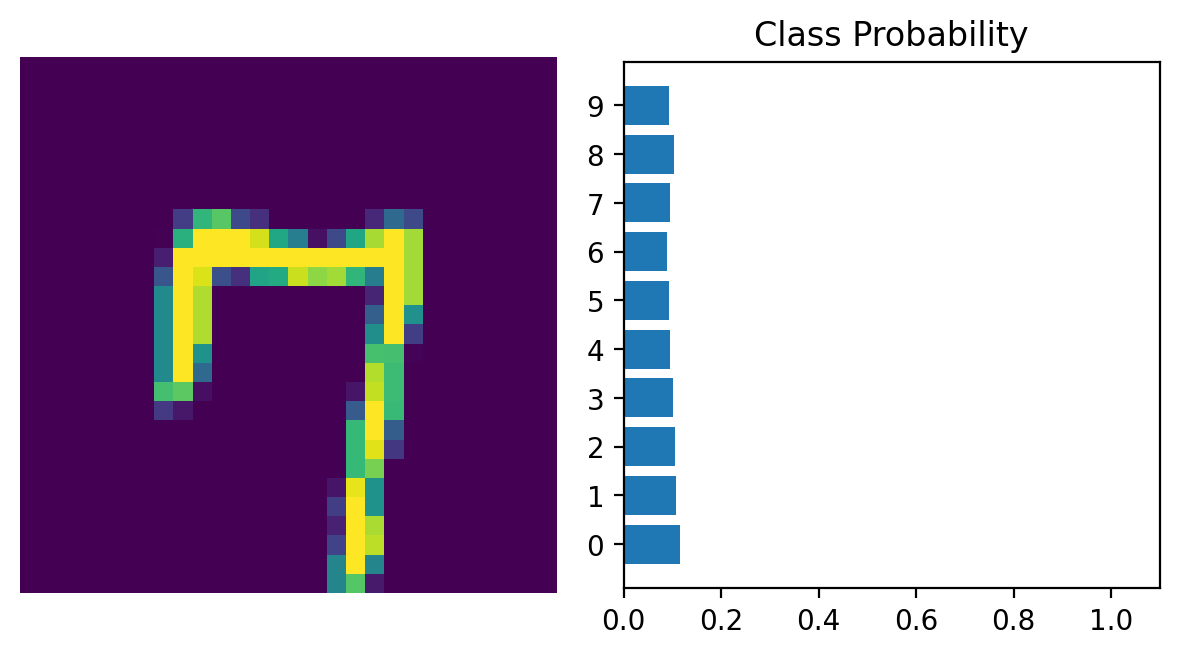

In [ ]:
dataiter = iter(trainloader)
images,labels = next(dataiter)
images.resize_(64,1,784)
img_idx = 0
ps = model.forward(images[img_idx,:])
img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


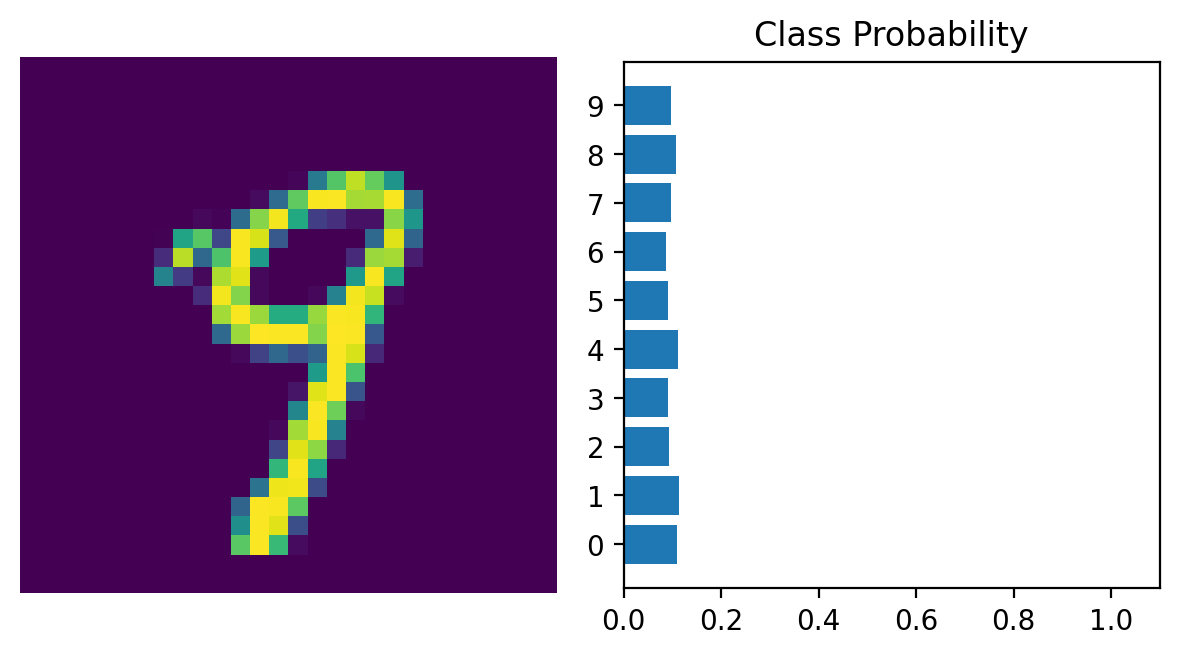

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [ ]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0343, -0.0269,  0.0328,  ..., -0.0113, -0.0095, -0.0213],
        [-0.0127,  0.0251,  0.0245,  ...,  0.0063, -0.0228, -0.0056],
        [ 0.0308,  0.0212, -0.0026,  ...,  0.0058,  0.0287,  0.0041],
        ...,
        [ 0.0014, -0.0310, -0.0107,  ..., -0.0333,  0.0282, -0.0099],
        [-0.0065,  0.0298, -0.0332,  ...,  0.0105, -0.0125, -0.0258],
        [ 0.0015, -0.0115,  0.0105,  ...,  0.0134,  0.0112, -0.0262]],
       requires_grad=True)

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('h1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('h2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (h1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (h2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
print(model[0])
print(model.h1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


In [ ]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3133, grad_fn=<NllLossBackward0>)


In [ ]:
# TODO: Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# TODO: Define the loss
criterion = nn.NLLLoss()

### Run this to check your work
# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logps = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3020, grad_fn=<NllLossBackward0>)


In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0039, -0.0039, -0.0039,  ..., -0.0039, -0.0039, -0.0039],
        ...,
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021]])


In [ ]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
print('Initial weights - ', model[0].weight)

dataiter = iter(trainloader)
images, labels = next(dataiter)
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0134,  0.0042, -0.0316,  ...,  0.0299,  0.0086,  0.0082],
        [ 0.0205,  0.0295, -0.0349,  ...,  0.0093,  0.0217,  0.0353],
        [ 0.0357, -0.0327,  0.0021,  ..., -0.0075,  0.0343, -0.0196],
        ...,
        [ 0.0205,  0.0245,  0.0214,  ..., -0.0168,  0.0246,  0.0311],
        [-0.0225, -0.0130,  0.0105,  ...,  0.0347,  0.0116, -0.0076],
        [-0.0089, -0.0079, -0.0290,  ...,  0.0321,  0.0281,  0.0344]],
       requires_grad=True)
Gradient - tensor([[-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0045,  0.0045,  0.0045,  ...,  0.0045,  0.0045,  0.0045],
        ...,
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025]])


In [ ]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0134,  0.0042, -0.0316,  ...,  0.0299,  0.0086,  0.0082],
        [ 0.0205,  0.0295, -0.0349,  ...,  0.0093,  0.0217,  0.0353],
        [ 0.0356, -0.0328,  0.0021,  ..., -0.0076,  0.0343, -0.0197],
        ...,
        [ 0.0205,  0.0245,  0.0214,  ..., -0.0168,  0.0246,  0.0311],
        [-0.0225, -0.0130,  0.0105,  ...,  0.0347,  0.0116, -0.0076],
        [-0.0088, -0.0078, -0.0290,  ...,  0.0321,  0.0282,  0.0344]],
       requires_grad=True)


In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8784707234358229
Training loss: 0.8279094658236006
Training loss: 0.5204811200086497
Training loss: 0.4284916068476909
Training loss: 0.3845971123591415


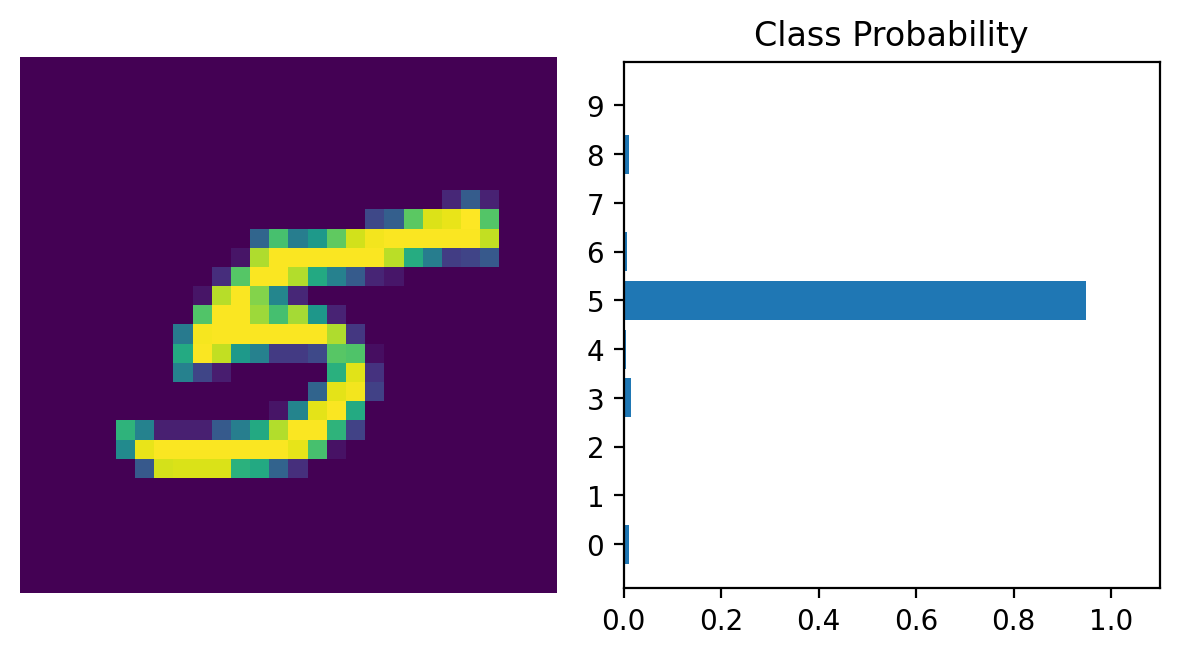

In [ ]:
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

##fashion classifier model


In [ ]:
import torch
from torchvision import datasets, transforms
import helper


In [ ]:

#define a transform to normalize data

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

#download and load training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64,shuffle = True)

#download and load test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

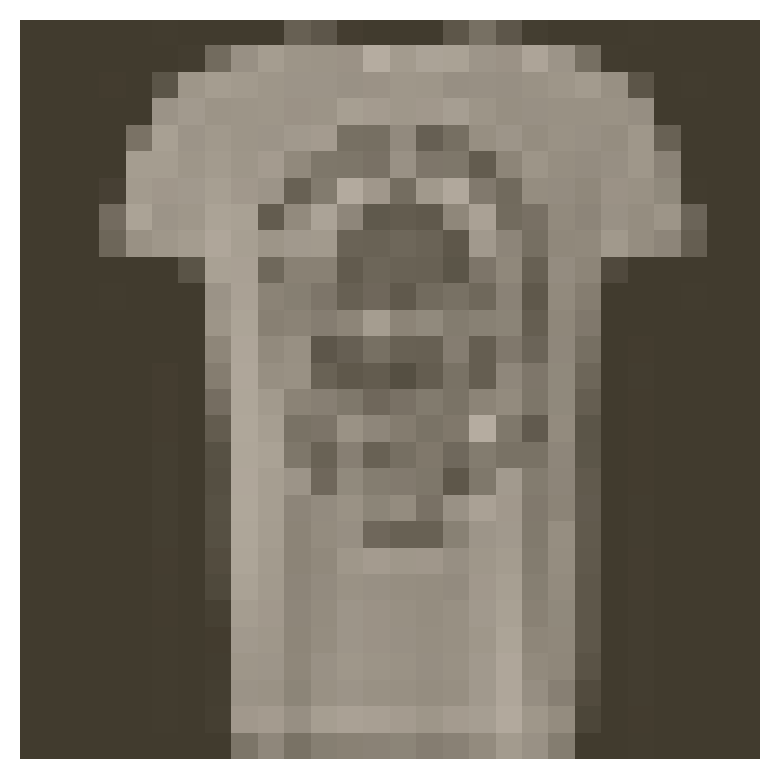

In [ ]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

MODEL ARCHITECTURE


In [ ]:
model == nn.Sequential(nn.Linear(784,256),
                       nn.ReLU(),
                       nn.Linear(256,256),
                       nn.ReLU(),
                       nn.Linear(256,128),
                       nn.ReLU(),
                       nn.Linear(128,128),
                       nn.ReLU(),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Linear(64,64),
                       nn.ReLU(),
                       nn.Linear(64,10),
                       nn.LogSoftmax(dim=1)
                       )

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 20
for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    # Flatten MNIST images into a 784 long vector
    images = images.view(images.shape[0],-1)
    #training pass
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.1434598242296086
Training loss: 0.6634631975690948
Training loss: 0.5830176832325169
Training loss: 0.5399980581264252
Training loss: 0.5115825113361833
Training loss: 0.49071475885697263
Training loss: 0.4745638584658535
Training loss: 0.46081219654855954
Training loss: 0.44974905814824584
Training loss: 0.43980318927434464
Training loss: 0.4312260876427581
Training loss: 0.42354225810529833
Training loss: 0.41640440214163205
Training loss: 0.4098406784188773
Training loss: 0.4041133757466192
Training loss: 0.39880821000792577
Training loss: 0.39337095864482524
Training loss: 0.3885359961404475
Training loss: 0.3842246108916777
Training loss: 0.37970473137555094


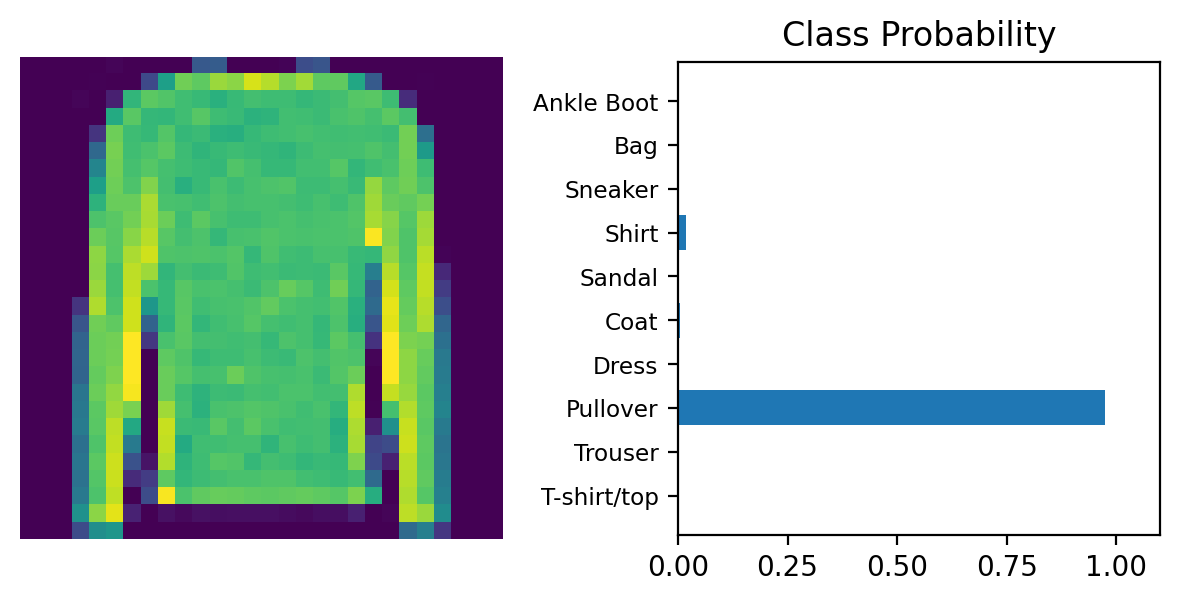

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')